# Ridge Regression Implementation with Gradient Descent

In this notebook, we will implement ridge regression via gradient descent. 

**outline for this notebook**

* We will write a Numpy function to compute the derivative of the regression weights with respect to a single feature
* We will write gradient descent function to compute the regression weights given an initial weight vector, step size, tolerance, and L2 penalty


## import library

First of all, let's import lirary that we will use in this notebook.

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

## read house sales data in

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [2]:
df = pd.read_csv("kc_house_data.csv")
colname_lst = list(df.columns.values)
coltype_lst =  [str, str, float, float, float, float, int, str, int, int, int, int, int, int, int, int, str, float, float, float, float]
col_type_dict = dict(zip(colname_lst, coltype_lst))
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## useful functions for leter use

Now we will write a function to convert our dataframe to numpy array.

In [3]:
def get_numpy_data(df, features, output):
    df['constant'] = 1 # this is how you add a constant column to an SFrame
    # add the column 'constant' to the front of the features list so that we can extract it along with the others:
    features = ['constant'] + features # this is how you combine two lists
    # select the columns of data_SFrame given by the features list into the SFrame features_sframe (now including constant):
    features_df = df[features]
    # the following line will convert the features_SFrame into a numpy matrix:
    feature_matrix = features_df.as_matrix()
    # assign the column of data_sframe associated with the output to the SArray output_sarray
    output_serie = df[output]
    # the following will convert the SArray into a numpy array by first converting it to a list
    output_array = output_serie.as_matrix()
    return(feature_matrix, output_array)

We also need the `predict_output()` function to compute the predictions for an entire matrix of features given the matrix and the weights. This function is defined as below.

In [4]:
def predict_output(feature_matrix, weights):
    # assume feature_matrix is a numpy matrix containing the features as columns and weights is a corresponding numpy array
    # create the predictions vector by using np.dot()
    predictions = np.dot(feature_matrix, weights)
    return(predictions)

## computing the derivative

We are now going to move to computing the derivative of the regression cost function. First of all, the cost function is the sum over the data points of the squared difference between an observed output and a predicted output, plus the L2 penalty term.
```
Cost(w)
= SUM[ (prediction - output)^2 ]
+ l2_penalty*(w[0]^2 + w[1]^2 + ... + w[k]^2).
```

Since the derivative of a sum is the sum of the derivatives, we can take the derivative of the first part (the RSS) and add the derivative of the regularization part.  As we saw, the derivative of the RSS with respect to `w[i]` can be written as: 
```
2*SUM[ error*[feature_i] ].
```
The derivative of the regularization term with respect to `w[i]` is:
```
2*l2_penalty*w[i].
```
Summing both terms, we get
```
2*SUM[ error*[feature_i] ] + 2*l2_penalty*w[i].
```
That is, the derivative for the weight for feature i is the sum (over data points) of 2 times the product of the error and the feature itself, plus `2*l2_penalty*w[i]`. 

**We will not regularize the constant.**  Thus, in the case of the constant, the derivative is just twice the sum of the errors (without the `2*l2_penalty*w[0]` term).

Now that twice the sum of the product of two vectors is just twice the dot product of the two vectors, therefore the derivative for the weight for feature_i is just two times the dot product between the values of feature_i and the current errors, plus `2*l2_penalty*w[i]`.

With this in mind complete the following derivative function which computes the derivative of the weight given the value of the feature (over all data points) and the errors (over all data points).  To decide when to we are dealing with the constant (so we don't regularize it) we added the extra parameter to the call `feature_is_constant` which you should set to `True` when computing the derivative of the constant and `False` otherwise.

In [5]:
#  get derivative for a particular weight i
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    derivative = 2 * np.dot(errors, feature)
    # If feature_is_constant is True, derivative is twice the dot product of errors and feature
    if not feature_is_constant:
        derivative +=  2 * l2_penalty * weight
    # Otherwise, derivative is twice the dot product plus 2*l2_penalty*weight
    return derivative

To test your feature derivartive run the following:

In [6]:
(example_features, example_output) = get_numpy_data(df, ['sqft_living'], 'price') 
my_weights = np.array([1., 10.])
test_predictions = predict_output(example_features, my_weights) 
errors = test_predictions - example_output # prediction errors

# next two lines should print the same values
print feature_derivative_ridge(errors, example_features[:,1], my_weights[1], 1, False)
print np.sum(errors*example_features[:,1])*2+20.
print ''

# next two lines should print the same values
print feature_derivative_ridge(errors, example_features[:,0], my_weights[0], 1, True)
print np.sum(errors)*2.

-5.6554166816e+13
-5.6554166816e+13

-22446749330.0
-22446749330.0


## gradient descent

Now we will write a function that performs a gradient descent. The basic premise is simple. Given a starting point we update the current weights by moving in the negative gradient direction. Recall that the gradient is the direction of *increase* and therefore the negative gradient is the direction of *decrease* and we're trying to *minimize* a cost function. 

The amount by which we move in the negative gradient *direction*  is called the 'step size'. We stop when we are 'sufficiently close' to the optimum. We will set a **maximum number of iterations** and take gradient steps until we reach this maximum number. If no maximum number is supplied, the maximum should be set 100 by default. (Use default parameter values in Python.)

With this in mind, the gradient descent function below uses our derivative function above. For each step in the gradient descent, we update the weight for each feature before computing our stopping criteria.

In [7]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations=100):
    weights = np.array(initial_weights) # make sure it's a numpy array
    iter = 0
    while iter < max_iterations:
    #while not reached maximum number of iterations:
        # compute the predictions based on feature_matrix and weights using your predict_output() function
        prediction = predict_output(feature_matrix, weights)
        # compute the errors as predictions - output
        error = prediction - output
        for i in xrange(len(weights)): # loop over each weight
            # Recall that feature_matrix[:,i] is the feature column associated with weights[i]
            # compute the derivative for weight[i].
            feature = feature_matrix[:, i]
            #(Remember: when i=0, you are computing the derivative of the constant!)
            derivative = feature_derivative_ridge(error, feature, weights[i], l2_penalty, i == 0)
            # subtract the step size times the derivative from the current weight
            weights[i] -= step_size * derivative
        iter += 1
    return weights

## visualising effect of L2 penalty

The L2 penalty gets its name because it causes weights to have small L2 norms than otherwise. Let's see how large weights get penalized. Let us consider a simple model with 1 feature:

In [8]:
simple_features = ['sqft_living']
my_output = 'price'

Let us split the dataset into training set and test set. Make sure to use `seed=0`:

In [9]:
idx = np.random.rand(len(df)) < 0.8
train = df[idx]; test = df[~idx]

In this part, we will only use `'sqft_living'` to predict `'price'`. Use the `get_numpy_data` function to get a Numpy versions of your data with only this feature, for both the `train_data` and the `test_data`. 

In [10]:
(simple_feature_matrix, output) = get_numpy_data(train, simple_features, my_output)
(simple_test_feature_matrix, test_output) = get_numpy_data(test, simple_features, my_output)

Let's set the parameters for our optimization:

In [11]:
initial_weights = np.array([0., 0.])
step_size = 1e-12
max_iterations=1000

First, let's consider no regularization.  Set the `l2_penalty` to `0.0` and run our ridge regression algorithm to learn the weights of our model. We'll use them later.

In [12]:
simple_weights_0_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, 0.0, max_iterations)
print simple_weights_0_penalty

[ -1.34976903e-01   2.63316982e+02]


Next, let's consider high regularization. Let's set the `l2_penalty` to `1e11` and run our ridge regression algorithm to learn the weights of our model. Then again, we'll use them later.

In [13]:
simple_weights_high_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, 1e11, max_iterations)
print simple_weights_high_penalty

[   9.77876417  124.14708828]


This code will plot the two learned models.  (The blue line is for the model with no regularization and the red line is for the one with high regularization.)

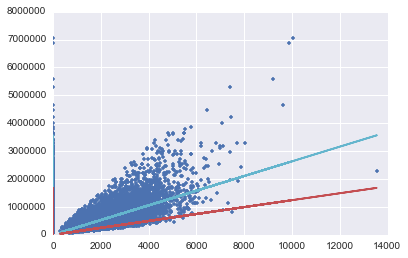

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(simple_feature_matrix,output,'b.',
         simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_0_penalty),'c-',
         simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_high_penalty),'r-')

Now let's compute the RSS on the TEST data for the following three sets of weights:
1. The initial weights (all zeros)
2. The weights learned with no regularization
3. The weights learned with high regularization

This is to see which weights perform best

In [15]:
def get_residual_sum_of_squares(feature_matrix, outcome, weights):
    # First get the predictions
    predicted_price = predict_output(feature_matrix, weights)
    # Then compute the residuals/errors
    residuals = predicted_price - outcome
    # print residuals
    # Then square and add them up
    RSS = (residuals * residuals).sum()
    return(RSS) 

In [16]:
rss_initial = get_residual_sum_of_squares(simple_test_feature_matrix, test_output, initial_weights)
print "RSS weights learned with initial weights (all zeros): $%.6f" % (rss_initial)

RSS weights learned with initial weights (all zeros): $1842274930383324.000000


In [17]:
rss_weights_noregulation = get_residual_sum_of_squares(simple_test_feature_matrix, test_output, simple_weights_0_penalty)
print "RSS weights learned with no regularization: $%.6f" % (rss_weights_noregulation)

RSS weights learned with no regularization: $294236342252336.750000


In [18]:
rss_weights_regulation = get_residual_sum_of_squares(simple_test_feature_matrix, test_output, simple_weights_high_penalty)
print "RSS weights learned with high regularization: $%.6f" % (rss_weights_regulation)

RSS weights learned with high regularization: $723302146993537.375000


## running a multiple regression with L2 penalty

Let us now consider a model with 2 features: `['sqft_living', 'sqft_living15']`.

First, let's create Numpy versions of your training and test data with these two features. 

In [21]:
model_features = ['sqft_living', 'sqft_living15'] # sqft_living15 is the average squarefeet for the nearest 15 neighbors. 
my_output = 'price'
(feature_matrix, output) = get_numpy_data(train_data, model_features, my_output)
(test_feature_matrix, test_output) = get_numpy_data(test_data, model_features, my_output)

We need to re-inialize the weights, since we have one extra parameter. Let us also set the step size and maximum number of iterations.

In [22]:
initial_weights = np.array([0.0,0.0,0.0])
step_size = 1e-12
max_iterations = 1000

First, let's consider no regularization.  Set the `l2_penalty` to `0.0` and run your ridge regression algorithm to learn the weights of your model.  Call your weights:

`multiple_weights_0_penalty`

In [23]:
feature_weights_0_penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, 0.0, max_iterations)
print feature_weights_0_penalty

[  -0.35743482  243.0541689    22.41481594]


Next, let's consider high regularization.  Set the `l2_penalty` to `1e11` and run your ridge regression algorithm to learn the weights of your model.  Call your weights:

`multiple_weights_high_penalty`

In [24]:
feature_weights_high_penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, 1e11, max_iterations)
print feature_weights_high_penalty

[  6.7429658   91.48927361  78.43658768]


Compute the RSS on the TEST data for the following three sets of weights:
1. The initial weights (all zeros)
2. The weights learned with no regularization
3. The weights learned with high regularization

Which weights perform best?

In [25]:
rss_initial_test = get_residual_sum_of_squares(test_feature_matrix, test_output, initial_weights)
print rss_initial_test

1.78427328252e+15


In [26]:
rss_noregularization_test = get_residual_sum_of_squares(test_feature_matrix, test_output, feature_weights_0_penalty)
print rss_noregularization_test

2.74067618287e+14


In [27]:
rss_regularization_test = get_residual_sum_of_squares(test_feature_matrix, test_output, feature_weights_high_penalty)
print rss_regularization_test

5.0040480058e+14


Predict the house price for the 1st house in the test set using the no regularization and high regularization models. (Remember that python starts indexing from 0.) How far is the prediction from the actual price?  Which weights perform best for the 1st house?

In [28]:
print 'true house1 price', test_output[0]

true house1 price 310000.0


In [29]:
predicted_price_house1_noregularization = predict_output(test_feature_matrix, feature_weights_0_penalty)[0]
print predicted_price_house1_noregularization

387465.476465


In [30]:
predicted_price_house1_regularization = predict_output(test_feature_matrix, feature_weights_high_penalty)[0]
print predicted_price_house1_regularization

270453.530305


***QUIZ QUESTIONS***
1. What is the value of the coefficient for `sqft_living` that you learned with no regularization, rounded to 1 decimal place?  What about the one with high regularization?
2. What are the RSS on the test data for each of the set of weights above (initial, no regularization, high regularization)? 
3. We make prediction for the first house in the test set using two sets of weights (no regularization vs high regularization). Which weights make better prediction <u>for that particular house</u>?

In [31]:
print predicted_price_house1_noregularization - test_output[0]
print predicted_price_house1_regularization - test_output[0]

77465.4764647
-39546.4696951
